# *SARIMA* fitting : Sales at Souvenir shop

In [2]:
souvenir <- read.csv("monthly-sales-for-a-souvenir-sho.csv",stringsAsFactors=F)
head(souvenir) #Monthly sales for a souvenir shop on the wharf at a beach resort town in Queensland, Australia. Jan 1987-Dec 1993[Edit]

Month,Monthly.sales.for.a.souvenir.shop.on.the.wharf.at.a.beach.resort.town.in.Queensland..Australia..Jan.1987.Dec.1993
1987-01,1664.81
1987-02,2397.53
1987-03,2840.71
1987-04,3547.29
1987-05,3752.96
1987-06,3714.74


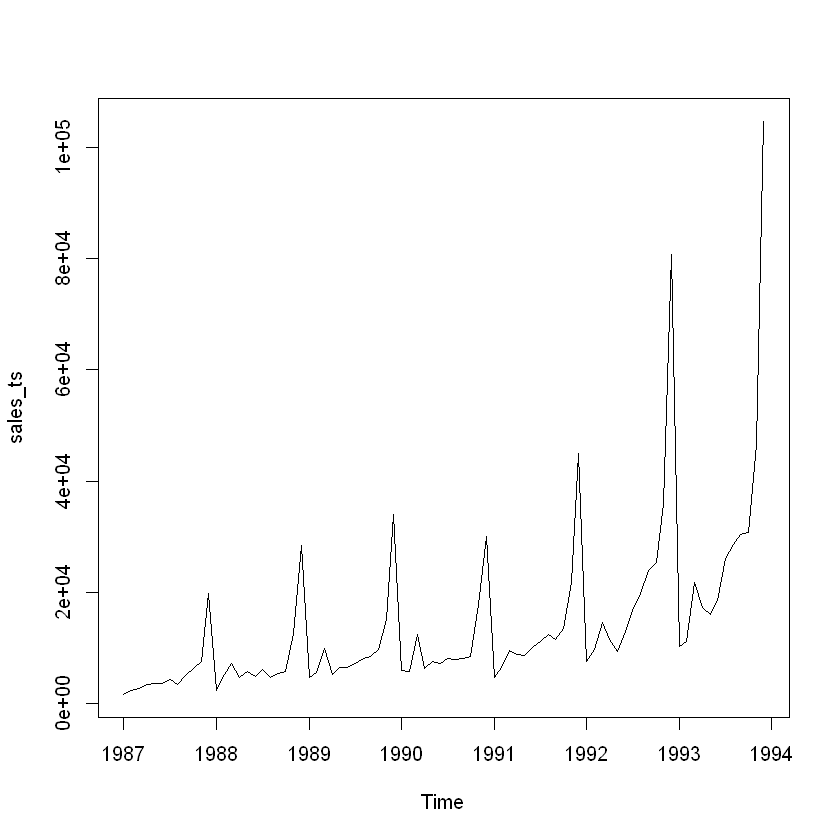

In [3]:
sales <- souvenir$Monthly.sales.for.a.souvenir.shop.on.the.wharf.at.a.beach.resort.town.in.Queensland..Australia..Jan.1987.Dec.1993
sales_ts <- ts(sales,start = c(1987),frequency = 12)
plot(sales_ts)

* from the plot following are evident,
    1. yearly seasonal variations
    2. variations are not constant (log-transformation is needed)
    3. there is an upward trend (so differencing is needed)
    
However lets have a look at the ACF and PACF plots

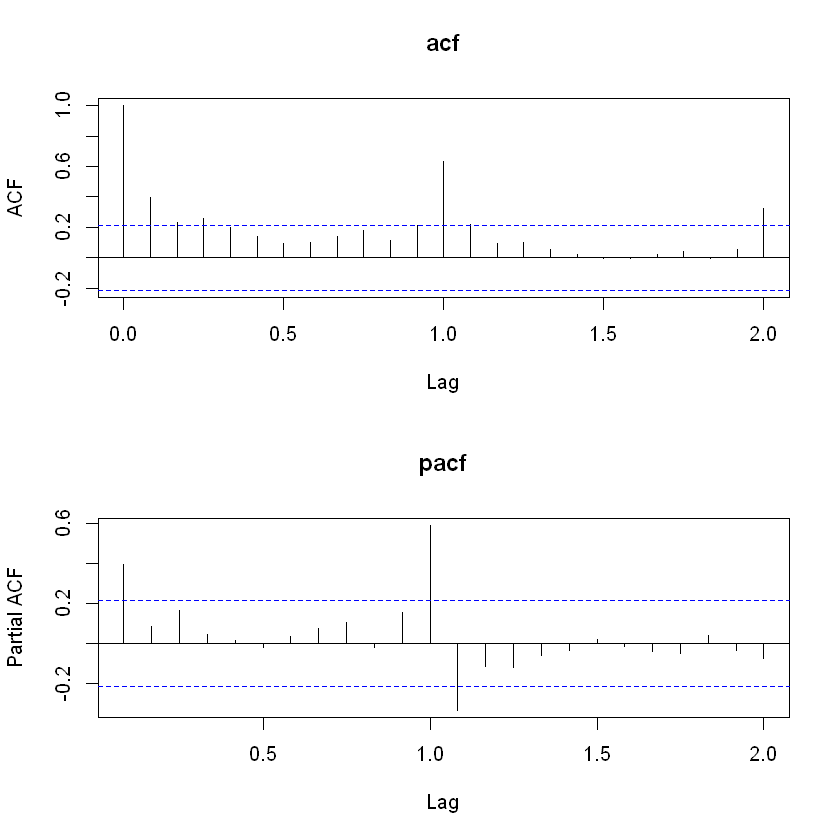

In [9]:
par(mfrow=c(2,1))
acf(sales_ts,main='acf',lag.max = 24)
pacf(sales_ts,main='pacf',lag.max = 24)

### Suggestions from plots
    ACF suggests non-seasonal MA process of lag 0 or 1
    ACF suggests seasonal MA process of lag 1 or 2
    PACF suggests non-seasonal AR process of lag 0 or 1
    PACF suggests seasonal AR process of lag 1

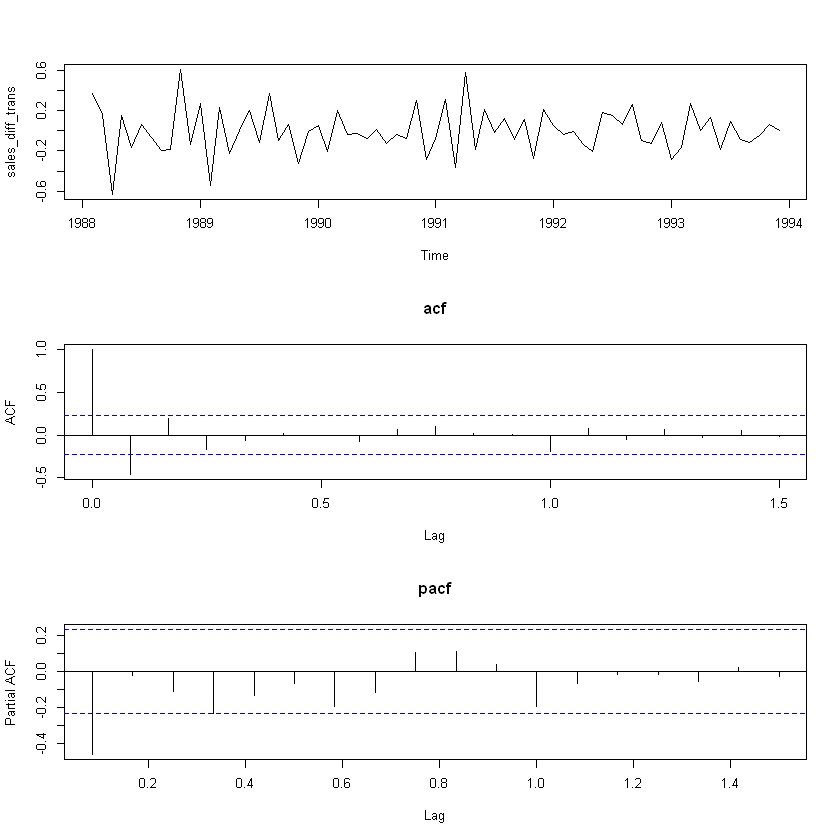

In [14]:
#let's do the transformation
sales_diff_trans <- diff(diff(log(sales_ts)),12)
par(mfrow=c(3,1))
plot(sales_diff_trans) #time-series looks stationary
acf(sales_diff_trans,main='acf')
pacf(sales_diff_trans,main='pacf')


In [24]:
library('forecast')
m <- auto.arima(log(sales_ts),max.p=1,d=1,max.q=1,max.P=1,max.Q=2,D=1)
m

Series: log(sales_ts) 
ARIMA(0,1,1)(0,1,1)[12]                    

Coefficients:
          ma1     sma1
      -0.5629  -0.4845
s.e.   0.1173   0.1628

sigma^2 estimated as 0.03237:  log likelihood=20.27
AIC=-34.55   AICc=-34.19   BIC=-27.76

In [26]:
Box.test(resid(m),type='Ljung-Box',lag=log(length(resid(m))))


	Box-Ljung test

data:  resid(m)
X-squared = 6.0205, df = 4.4308, p-value = 0.2417


initial  value -1.514760 
iter   2 value -1.669523
iter   3 value -1.684241
iter   4 value -1.684296
iter   5 value -1.684299
iter   5 value -1.684299
iter   5 value -1.684299
final  value -1.684299 
converged
initial  value -1.699931 
iter   2 value -1.703483
iter   3 value -1.704469
iter   4 value -1.704469
iter   4 value -1.704469
iter   4 value -1.704469
final  value -1.704469 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ma1     sma1
      -0.5629  -0.4845
s.e.   0.1173   0.1628

sigma^2 estimated as 0.03144:  log likelihood = 20.27,  aic = -34.55

$degrees_of_freedom
[1] 82

$ttable
     Estimate     SE t.value p.value
ma1   -0.5629 0.1173 -4.8006  0.0000
sma1  -0.4845 0.1628 -2.9767  0.0038

$AIC
[1] -2.411905

$AICc
[1] -2.384524

$BIC
[1] -3.354028


initial  value -1.527727 
iter   2 value -1.675635
iter   3 value -1.682326
iter   4 value -1.682437
iter   5 value -1.682439
iter   5 value -1.682439
iter   5 value -1.682439
final  value -1.682439 
converged
initial  value -1.692103 
iter   2 value -1.704334
iter   3 value -1.707567
iter   4 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
iter   5 value -1.707595
final  value -1.707595 
converged


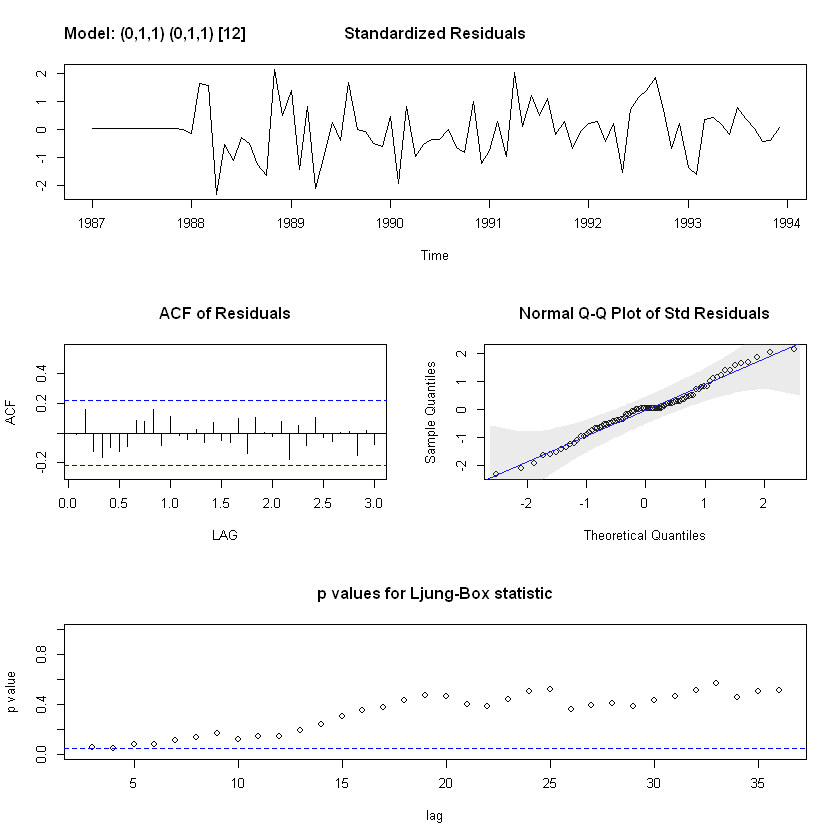

$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ar1     sma1
      -0.5017  -0.5107
s.e.   0.1013   0.1543

sigma^2 estimated as 0.03111:  log likelihood = 20.49,  aic = -34.99

$degrees_of_freedom
[1] 82

$ttable
     Estimate     SE t.value p.value
ar1   -0.5017 0.1013 -4.9531  0.0000
sma1  -0.5107 0.1543 -3.3098  0.0014

$AIC
[1] -2.422705

$AICc
[1] -2.395324

$BIC
[1] -3.364828


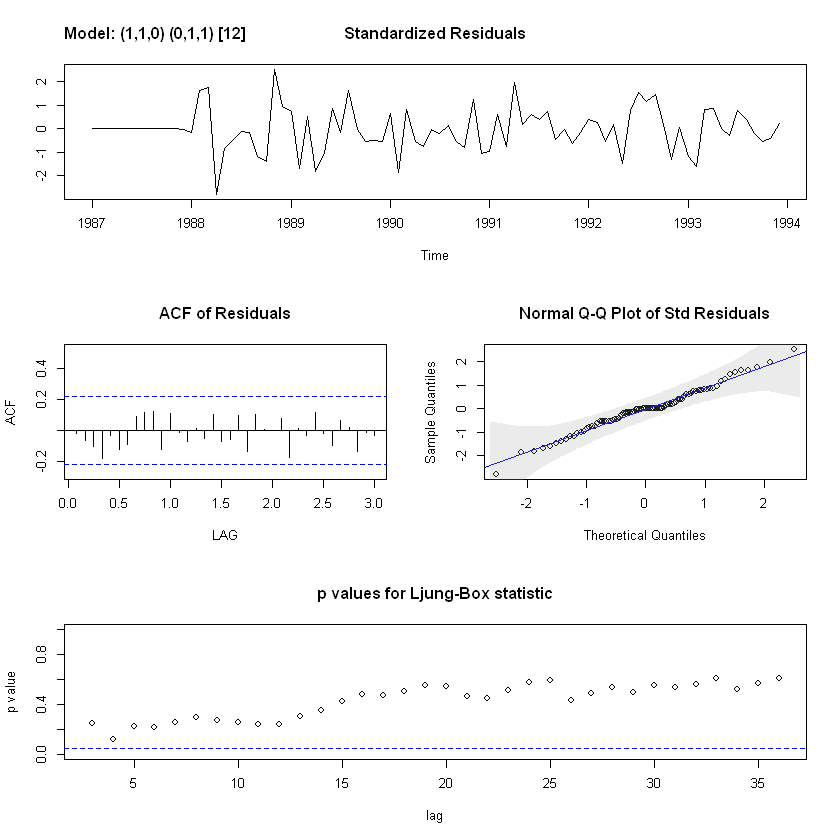

In [29]:
library('astsa')
sarima(log(sales_ts),0,1,1,0,1,1,12)
sarima(log(sales_ts),1,1,0,0,1,1,12)


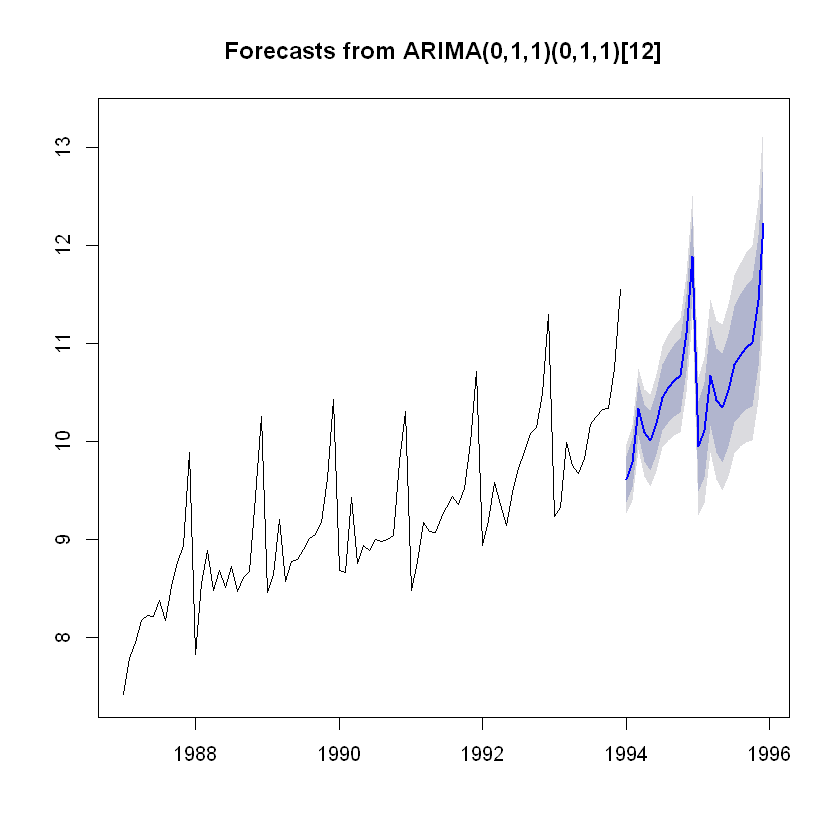

In [28]:
plot(forecast(m))

In [34]:
auto.arima(log(sales_ts))

Series: log(sales_ts) 
ARIMA(2,0,0)(1,1,0)[12] with drift         

Coefficients:
         ar1     ar2     sar1   drift
      0.3493  0.3602  -0.3278  0.0247
s.e.  0.1086  0.1159   0.1335  0.0044

sigma^2 estimated as 0.03182:  log likelihood=23.04
AIC=-36.09   AICc=-35.18   BIC=-24.71